# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('SINASC_RO_2019.csv')

/tmp/ipykernel_121/1960475633.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('SINASC_RO_2019.csv')


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
intervalos = [0, 3, 5, 7, 10]
rotulos = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

df['APGAR5_categorizada'] = pd.cut(df['APGAR5'], bins= intervalos, labels= rotulos, include_lowest= True)
df['APGAR5_categorizada']

0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
13783    normal
13784    normal
13785    normal
13786    normal
13787       NaN
Name: APGAR5_categorizada, Length: 13788, dtype: category
Categories (4, object): ['asfixia grave' < 'asfixia moderada' < 'asfixia leve' < 'normal']

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='GESTACAO', ylabel='APGAR5'>

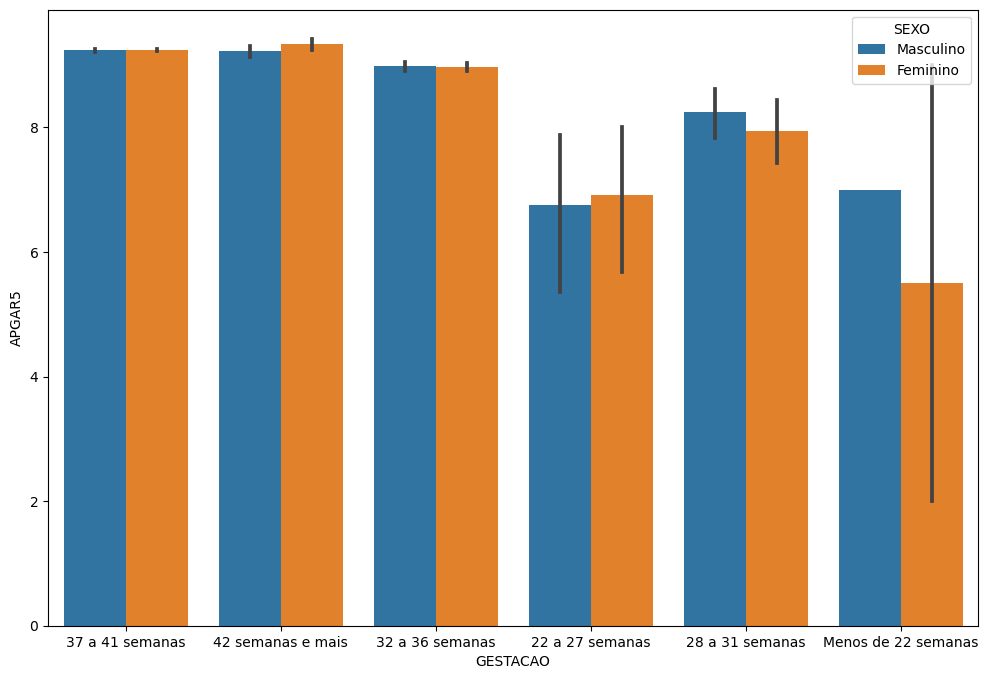

In [4]:
plt.figure(figsize= (12, 8))
sns.barplot(x= 'GESTACAO', y= 'APGAR5', hue= 'SEXO', data= df)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5_categorizada'])
tabela_cruzada

APGAR5_categorizada,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,10,1,7,32
28 a 31 semanas,2,7,7,80
32 a 36 semanas,2,10,34,1169
37 a 41 semanas,23,13,98,11250
42 semanas e mais,0,0,4,350
Menos de 22 semanas,1,0,1,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
porcentagem_tabela_cruzada = tabela_cruzada.div(tabela_cruzada.sum(axis= 1), axis= 0)
tabela_cruzada.sum(axis= 1)

GESTACAO
22 a 27 semanas           50
28 a 31 semanas           96
32 a 36 semanas         1215
37 a 41 semanas        11384
42 semanas e mais        354
Menos de 22 semanas        3
dtype: int64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

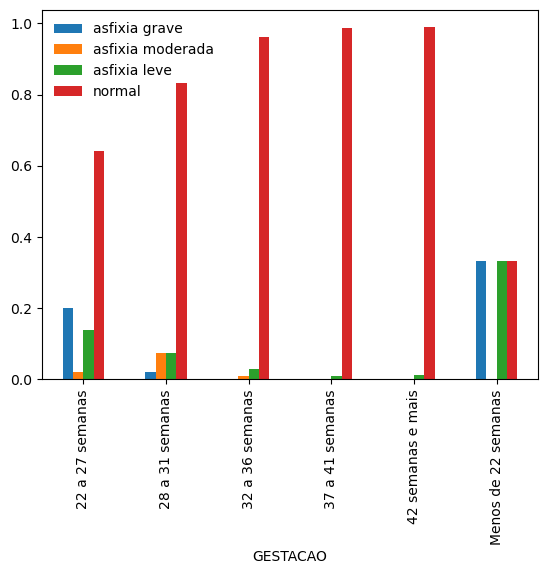

In [7]:
porcentagem_tabela_cruzada.plot(kind= 'bar').legend(loc= 'upper left', frameon = False)

Como observado pelo grafico, esta correta a afirmativa de que bebes com mais de 37 semanas apresentem menos probabilidade de asfixia.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

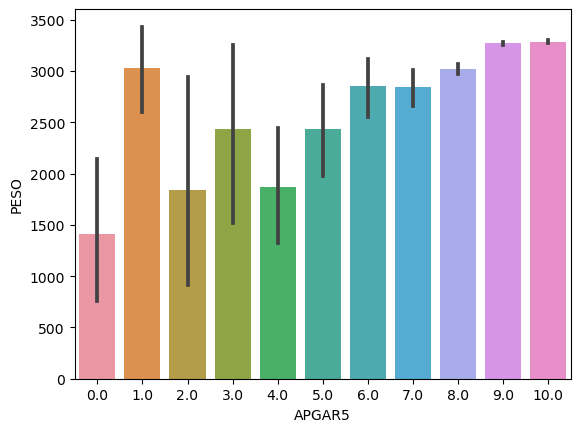

In [9]:
sns.barplot(x= 'APGAR5', y= 'PESO', data= df)

<Axes: xlabel='APGAR5', ylabel='PESO'>

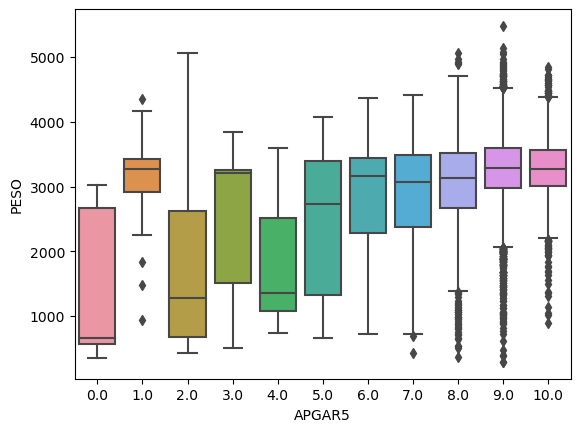

In [15]:
sns.boxplot(x= 'APGAR5', y= 'PESO', data= df)